In [8]:
# Prepare model, data pre-processors and coordinate scalers

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

from tensorflow import keras

import joblib

import sys
sys.path.insert(0, '/home/miguel/Projects/smlm_z/publication/')
from util.util import grid_psfs, load_dataset, save_dataset, load_model, preprocess_img_dataset

from tifffile import imread
import numpy as np

# model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_autofocus/out_roll_alignment'
# test_data_dir = '/home/miguel/Projects/data/08042024_beads4Miguel/ROI2_timelapse_30_1min_1'
# test_case = 'ROI2_timelapse_30_1min_1_MMStack_Default.ome.tif'

# model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_autofocus2/out_roll_alignment'
# test_data_dir = '/home/miguel/Projects/data/11042024_beads4Miguel/ROI10_TIMELAPSE_61count_1min_1/'
# test_case = 'ROI10_TIMELAPSE_61count_1min_1_MMStack_Default.ome.tif'

# model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_openframe_20240510/out'
# test_data_dir = '/media/Backup/smlm_z_data/20240510_Miguel_beads/zstacks/100nm_tetraspeck/timelapse_1hr_1sec_interval_1'
# test_case = 'timelapse_1hr_1sec_interval_1_MMStack_Default.ome.tif'
# comparison_data = '/home/miguel/Projects/data/20240415_beads_AF_Miguel/autofocus.csv'
# PIXEL_SIZE = 106

# model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_openframe_20240510_20nm_tmp/out'
# test_data_dir = '/media/Backup/smlm_z_data/20240510_Miguel_beads/zstacks/20nm_red/timelapse_1hr_1sec_1/'
# test_case = 'timelapse_1hr_1sec_1_MMStack_Default.ome.tif'
# comparison_data = '/home/miguel/Projects/data/20240415_beads_AF_Miguel/autofocus.csv'
# PIXEL_SIZE = 118


# Experiment1
# model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/out_24_nvidia6/'
# test_data_dir = '/media/Backup/smlm_z_data/20240603_Miguel_Zeiss_Stacks/timelapse_20nm_4/'
# test_case = 'timelapse_20nm_4_MMStack_Default.ome.tif'
# comparison_data = '/media/Backup/smlm_z_data/20240603_Miguel_Zeiss_Stacks/Z_list.txt'
# key_frame_locs = 'timelapse_20nm_4_MMStack_Default_slice.ome_locs.hdf5'
# out_fig_name = './autofocus_experiment1.png'
# PIXEL_SIZE = 106

# Expeimrent 2
model_result_dir = '/home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/out_24_nvidia6/'
test_data_dir = '/media/Backup/smlm_z_data/20240606_bacteria_Miguel_zeiss/15min_timelapse_20nm_red_beads_every_1sec_1/'
test_case = '15min_timelapse_20nm_red_beads_every_1sec_1_MMStack_Default.ome.tif'
comparison_data = '/media/Backup/smlm_z_data/20240606_bacteria_Miguel_zeiss/15min_timelapse_20nm_red_beads_every_1sec_1/Z_list.txt'
key_frame_locs = '15min_timelapse_20nm_red_beads_every_1sec_1_MMStack_Default_slice.ome_locs.hdf5'
out_fig_name = './autofocus_experiment2.png'
PIXEL_SIZE = 106


from PIL import Image
img = np.array(Image.open(os.path.join(test_data_dir, test_case)))
im_size_nm = np.array(img.shape) * PIXEL_SIZE


In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import shutil
from localise_exp_sample import main as loc_exp_sample_main, preprocess_args

test_fpath = os.path.join(test_data_dir, test_case)

locs_path = test_fpath.replace('.tif', '_locs.hdf5')
spots_path = test_fpath.replace('.tif', '_spots.hdf5')
outdir_name = '_'.join(test_data_dir.split('/')[-2:])
outdir = os.path.join(model_result_dir, f'timelapse_{outdir_name}')
os.makedirs(outdir, exist_ok=True)
args = {
    'locs': locs_path,
    'spots': spots_path,
    'outdir': outdir,
    'model_dir': model_result_dir,
    'picked_locs': None,
    # 'norm': norm,
    'pixel_size': PIXEL_SIZE,
    'sensitivity': 1,
    'gain': 1,
    'baseline': 100
}
args = preprocess_args(args)
loc_exp_sample_main(args)

locs_path = os.path.join(args['outdir'], 'locs_3d.hdf5')
locs = pd.read_hdf(locs_path, key='locs')
print('Loading', locs_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using model dir from parameter -mo/--model-dir
/media/Backup/smlm_z_data/20240606_bacteria_Miguel_zeiss/15min_timelapse_20nm_red_beads_every_1sec_1/15min_timelapse_20nm_red_beads_every_1sec_1_MMStack_Default.ome_locs.yaml
fov-max
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


 14%|████████████▍                                                                             | 5961/43199 [19:45:35<123:26:20, 11.93s/it]


(37688, 12) (37688, 15, 15)
Gen 2d plot
Gen example splots
Applying pre-processing
Coords value range: 0.005496466 0.99113375


/home/miguel/anaconda3/envs/smlm_z/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


19/19 [==============================] - 1s 25ms/step
Wrote results to:
	- /home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/out_24_nvidia6/timelapse_15min_timelapse_20nm_red_beads_every_1sec_1_/locs_3d.hdf5
	- /home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/out_24_nvidia6/timelapse_15min_timelapse_20nm_red_beads_every_1sec_1_/locs_3d.yaml
Loading /home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/out_24_nvidia6/timelapse_15min_timelapse_20nm_red_beads_every_1sec_1_/locs_3d.hdf5


/home/miguel/anaconda3/envs/smlm_z/lib/python3.11/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'z [nm]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/miguel/anaconda3/envs/smlm_z/lib/python3.11/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'x [nm]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/miguel/anaconda3/envs/smlm_z/lib/python3.11/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'y [nm]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this obje

In [10]:
import h5py

with h5py.File(spots_path, 'r') as f:
    spots = np.array(f['spots'])


(21, 12) (37688, 17)


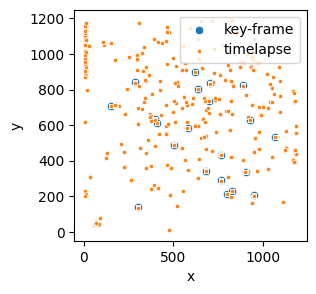

(21, 12)
(37688, 17)
Kept 18900 from 37688


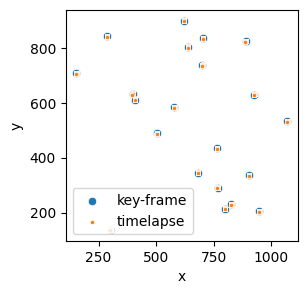

(18900, 20) (18900, 15, 15)


In [11]:
# Filter timelapse locs so only those in key frame are kept
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import euclidean_distances

def snr(x):
    return x.max() / x.mean()
    
key_frame_df = pd.read_hdf(os.path.join(test_data_dir, key_frame_locs), key='locs')
key_frame_df = key_frame_df[key_frame_df['net_gradient']>35000]
print(key_frame_df.shape, locs.shape)
plt.figure(figsize=(3,3))
sns.scatterplot(data=key_frame_df, x='x', y='y', label='key-frame')
sns.scatterplot(data=locs, x='x', y='y', label='timelapse', marker='.')
plt.legend()
plt.show()
print(key_frame_df.shape)
print(locs.shape)

locs_xy = locs[['x', 'y']].to_numpy()
key_frame_xy = key_frame_df[['x', 'y']].to_numpy()

dists = euclidean_distances(locs_xy, key_frame_xy)
threshold = 5

idx = np.argwhere(dists.min(axis=1)<threshold)[:, 0]
print(f'Kept {len(idx)} from {locs.shape[0]}')
locs = locs.iloc[idx]
spots = spots[idx]
locs['spot_id'] = np.arange(spots.shape[0])

locs['closest_key_loc'] = dists[idx].argmin(axis=1).astype(str)

locs['snr'] = [snr(x) for x in spots]

plt.figure(figsize=(3,3))
sns.scatterplot(data=key_frame_df, x='x', y='y', label='key-frame')
sns.scatterplot(data=locs, x='x', y='y', label='timelapse', marker='.')
plt.legend()
plt.show()
print(locs.shape, spots.shape)

Text(0, 0.5, 'Number of beads in frame')

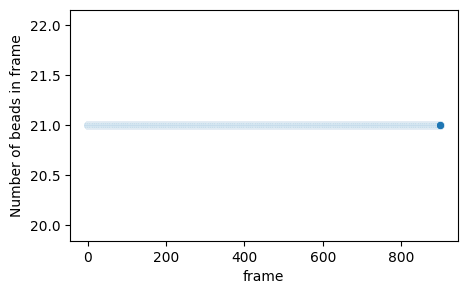

In [12]:
plt.figure(figsize=(5,3))
df2 = locs.groupby('frame').count()
sns.scatterplot(data=df2, x='frame', y='z [nm]')
plt.ylabel('Number of beads in frame')

In [43]:
from scipy.optimize import curve_fit
import numpy as np
from sklearn.metrics import mean_squared_error
import h5py 

def reduce_img(stack):
    return stack.max(axis=(1,2))

PX_SIZE = _, 106, 106
def get_lat_fwhm(image, debug=False, mse_thres=0.001):
    
    def gaussian_2d(xy, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
        x, y = xy
        xo = float(xo)
        yo = float(yo)
        a = (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
        b = -(np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
        c = (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
        g = offset + amplitude * np.exp(- (a * ((x - xo)**2) + 2 * b * (x - xo) * (y - yo) + c * ((y - yo)**2)))
        return g.ravel()

    # Load and preprocess the image (e.g., convert to grayscale)
    # For simplicity, let's generate a simple image for demonstration
    image_size = image.shape[1]
    x = np.linspace(0, image_size - 1, image_size)
    y = np.linspace(0, image_size - 1, image_size)
    x, y = np.meshgrid(x, y)
    
    image = image / image.max()

    # Fit the Gaussian to the image data
    p0 = [1, image_size / 2, image_size / 2, 2, 2, 0, 0]  # Initial guess for parameters
    bounds = [
        (0, np.inf),
        (image_size * (1/5), image_size),
        (image_size * (1/5), image_size),
        (0, image_size),
        (0, image_size),
        (-np.inf, np.inf),
        (0, np.inf),
    ]

    try:
        popt, pcov = curve_fit(gaussian_2d, (x, y), image.ravel(), p0=p0, bounds=list(zip(*bounds)))
    except RuntimeError as e:
        popt = p0
    render = gaussian_2d((x, y), *popt).reshape(image.shape)

    error = mean_squared_error(render, image)
    if error > mse_thres:
        fwhm_x, fwhm_y =  np.nan, np.nan
    else:
        amplitude, xo, yo, sigma_x, sigma_y, theta, offset = popt
        f = 2 * np.sqrt(2 * np.log(2))
        fwhm_x = sigma_x * f * PX_SIZE[1]
        fwhm_y = sigma_y * f * PX_SIZE[2]


    if debug:
        plt.figure(figsize=(2,2))
        print('FWHM x:', round(fwhm_x, 3), 'nm')
        print('FWHM y:', round(fwhm_y, 3), 'nm')
        print('MSE   :', '{:.2e}'.format(error))
        plt.imshow(image)
        plt.show()
        print('\n')
    return np.mean([fwhm_x, fwhm_y])

from tqdm import tqdm
fwhms = [get_lat_fwhm(img) for img in tqdm(spots)]
locs['fwhm'] = fwhms


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 18900/18900 [01:57<00:00, 161.50it/s]


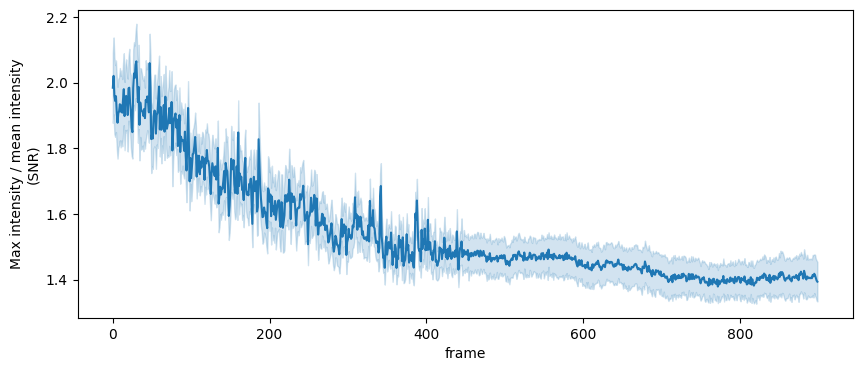

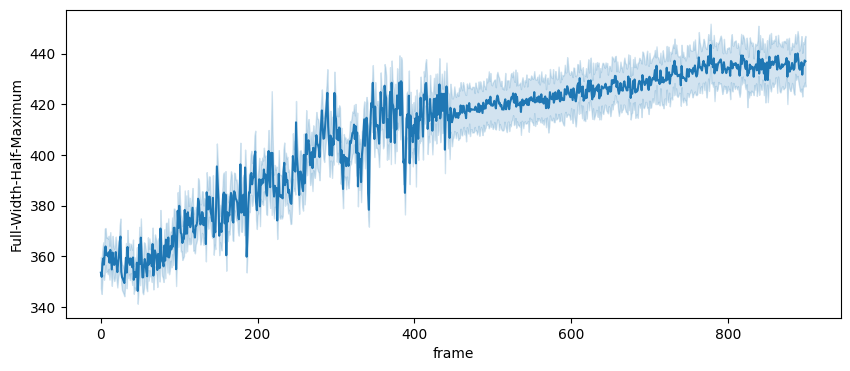

In [166]:
# locs['frame_bin'] = pd.cut(locs['frame'], np.linspace(locs['frame'].min(), 900, 10, endpoint=True))
# locs['frame_bin'] = locs['frame_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10, 4))
sns.lineplot(data=locs, x='frame', y='snr', errorbar=("se", 2))
plt.ylabel(r'Max intensity / mean intensity' "\n" '(SNR)')
plt.savefig('./autofocus_experiment2_snr.png')
plt.show()

plt.figure(figsize=(10, 4))
sns.lineplot(data=locs, x='frame', y='fwhm', errorbar=("se", 2))
plt.ylabel('Full-Width-Half-Maximum')
plt.savefig('./autofocus_experiment2_fwhm.png')
plt.show()
    

In [236]:
from tifffile import imread
training_data = imread('/home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/stacks.ome.tif')
locs = pd.read_hdf('/home/miguel/Projects/smlm_z/autofocus/VIT_zeiss_lowsnr_data/locs.hdf', key='locs')

print(training_data.shape, locs.shape)
Z_STEP = 10

snrs = []
for stack in training_data:
    stack = stack / stack.max()
    snrs.append(stack.max()/stack.mean())


snrs = np.array(snrs)
groups = [(0, 50000), (75000, np.inf)]
group_idx = [np.random.choice(np.argwhere((locs['photons']>=g[0]) * (locs['photons']<=g[1]))[:, 0], 50) for g in groups]

(913, 601, 15, 15) (913, 16)


In [237]:
imgs, zs, group = [], [], []

for g, idx in zip(['low', 'high'], group_idx):
    for stack in training_data[idx]:
        group.extend([g] * stack.shape[0])
        peak = np.argmax(stack.max(axis=(1,2)))
        z = (np.arange(stack.shape[0])-peak) * Z_STEP
        imgs.append(stack)
        zs.append(z)
        
imgs = np.concatenate(imgs)
zs = np.concatenate(zs)
snrs = np.array([snr(img) for img in tqdm(imgs)])


100%|████████████████████████████████████████████████████████████████████████████████████████████| 60100/60100 [00:00<00:00, 198269.35it/s]


In [238]:

from multiprocessing import Pool

with Pool(16) as p:
    fwhms = list(tqdm(p.imap(get_lat_fwhm, imgs), total=imgs.shape[0], miniters=imgs.shape[0]/100))


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 60100/60100 [01:41<00:00, 592.45it/s]


In [239]:
fwhms = np.array(fwhms)
group = np.array(group)

In [240]:
zs.shape, snrs.shape, fwhms.shape, group.shape

((60100,), (60100,), (60100,), (60100,))

In [244]:
training_data_df = pd.DataFrame.from_dict({'z': zs, 'snr': snrs, 'fwhm': fwhms, 'photon count': group})
training_data_df.to_csv('./tmp.csv')

In [250]:
df = pd.read_csv('./tmp.csv')
df = df[abs(df['z'])<=1000]
df['z_bin'] = pd.cut(df['z'], np.linspace(0, 1000, 11, endpoint=True))
df['z_bin'] = df['z_bin'].apply(lambda x: int(x.mid))

<Figure size 1000x300 with 0 Axes>

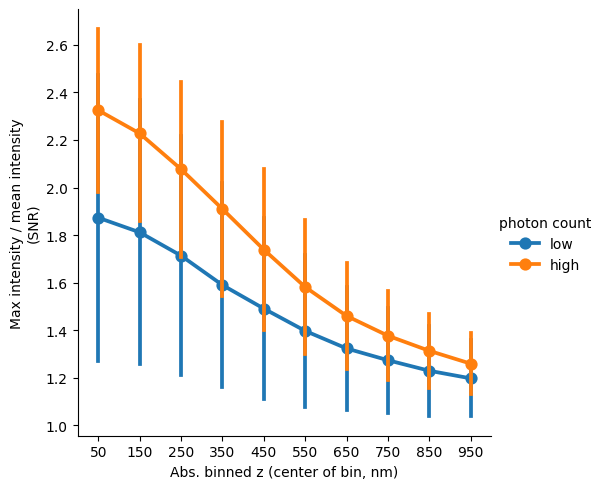

<Figure size 1000x300 with 0 Axes>

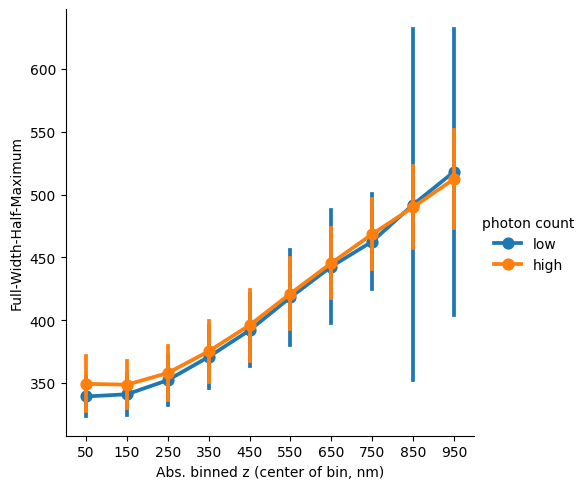

In [253]:
plt.figure(figsize=(10,3))
sns.catplot(data=df, x='z_bin', y='snr', kind='point', errorbar='sd', hue='photon count')
plt.ylabel(r'Max intensity / mean intensity' "\n" '(SNR)')
plt.xlabel('Abs. binned z (center of bin, nm)')
plt.savefig('./autofocus_experiment2_snr_training_data.png')
plt.show()

plt.figure(figsize=(10,3))
sns.catplot(data=df, x='z_bin', y='fwhm', kind='point', errorbar='sd', hue='photon count')
plt.ylabel(r'Full-Width-Half-Maximum')
plt.xlabel('Abs. binned z (center of bin, nm)')
plt.savefig('./autofocus_experiment2_fwhm_training_data.png')
plt.show()

In [14]:
import h5py
import matplotlib.pyplot as plt
import seaborn as sns


def snr(x):
    return x.max() / x.mean()

z_preds = locs['z [nm]']
print(spots.shape)
inten = spots.max(axis=(1,2))
mean = spots.mean(axis=(1,2))
snrs = np.array([snr(x) for x in spots])

df = pd.DataFrame.from_dict({'z_pred': z_preds, 'means': mean, 'inten': inten, 'snr': snrs})

# plt.figure(figsize=(3,3))
# sns.kdeplot(data=df, x='z_pred', y='means', label='means')
# sns.kdeplot(data=df, x='z_pred', y='inten', label='inten')
# # sns.kdeplot(x=z_preds, y=inten, label='max')
# # sns.kdeplot(x=z_preds, y=mean, label='mean')
# plt.xlabel('Z pred')
# plt.ylabel('Max / mean pixel value')
# plt.legend()
# plt.show()

# plt.figure(figsize=(3,3))
# sns.kdeplot(data=df, x='z_pred', y='snr')
# plt.show()


(18900, 15, 15)


In [ ]:
# import os
# import pandas as pd
# import seaborn as sns

# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 3))
# sns.kdeplot(data=locs, x='frame', y='z [nm]')
# plt.xlabel('Frame')
# plt.ylabel('Pred z (um)')
# plt.show()

In [15]:
# Recenter xy to 0, 0
locs['x [nm]'] -= im_size_nm[0]/2
locs['y [nm]'] -= im_size_nm[1]/2




In [16]:

def snr(x):
    return x.max() / x.mean()

locs['snr'] = [snr(x) for x in spots]

<Figure size 500x300 with 0 Axes>

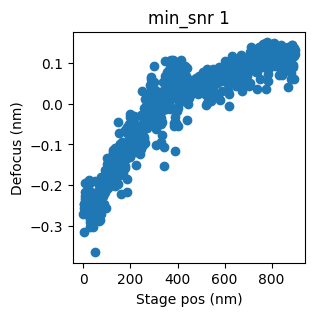

<Figure size 500x300 with 0 Axes>

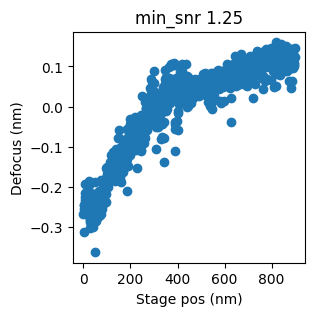

<Figure size 500x300 with 0 Axes>

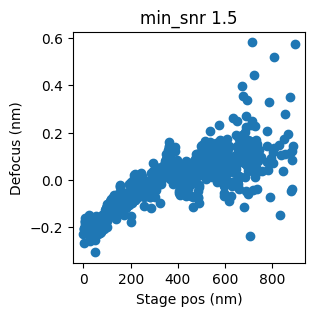

<Figure size 500x300 with 0 Axes>

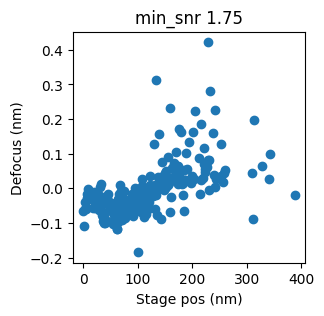

<Figure size 500x300 with 0 Axes>

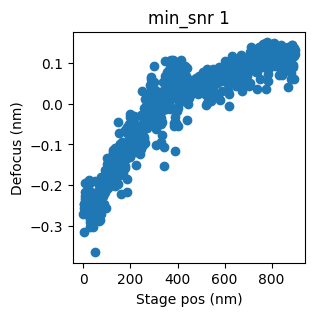

In [18]:
# Fit plane, remove outliers and re-fit plane
from sklearn.linear_model import LinearRegression
import seaborn as sns
from data.visualise import grid_psfs
import numpy as np



xy_nm = locs[['x [nm]', 'y [nm]']].to_numpy()
pred_z = locs['z [nm]'].to_numpy()

def reduce_frame_planes(locs, min_snr=None):
    if min_snr is not None:
        locs = locs[locs['snr']>min_snr]
    frames = []
    pred_frame_z_init = []
    pred_frame_z_refit = []
    frame_errors = []
    n_locs_frame = []
    for frame in list(sorted(set(locs['frame']))):
        idx = np.argwhere(locs['frame']==frame).squeeze()
        if idx.size<4:
            # pred_frame_z_init.append(np.mean(pred_z[idx]))
            # pred_frame_z_refit.append(np.mean(pred_z[idx]))
            # print(f'Frame {frame} has insufficient locs')
            continue
        XY_data = xy_nm[idx]
        Z_data = pred_z.squeeze()[idx]
        reg = LinearRegression().fit(XY_data, Z_data)
              
        pred_frame_z_init.append(reg.intercept_)
    
        
        z_fit = reg.predict(XY_data)
        errors = abs(z_fit - Z_data)
        # if frame == 550:
        #     sns.scatterplot(x=XY_data[:, 0], y=XY_data[:, 1], hue=Z_data)
        #     plt.show()
    
    
        # if abs(frame-50) < 10:
        #     print(reg.__dict__)
        #     x, y = np.meshgrid(np.linspace(xy_nm[:, 0].min(), xy_nm[:, 0].max(), 10), np.linspace(xy_nm[:, 1].min(), xy_nm[:, 1].max(), 10))
        #     xy2 = np.vstack((x.flatten(), y.flatten())).T
        #     z = reg.predict(XY_data)
        #     error = z-Z_data
        #     plt.figure(figsize=(3,3))
        #     plt.scatter(x=XY_data[:, 0], y=XY_data[:, 1], c=error)
        #     plt.colorbar()
        #     plt.show()
    
        idx = np.argwhere(errors<1000).squeeze()
        
        XY_data = XY_data[idx]
        Z_data = Z_data[idx]
        
        reg2 = LinearRegression().fit(XY_data, Z_data)
        
        
        residual = reg.predict(XY_data)
        res_error = np.std(residual / 1000)
    
        if len(idx) < 5:
            z = np.nan
        else:
            z = reg2.intercept_
    
        frames.append(frame)
        pred_frame_z_refit.append(z)
        frame_errors.append(res_error)
        n_locs_frame.append(len(idx))

    pred_frame_z_init = np.array(pred_frame_z_init)
    
    pred_frame_z_refit = np.array(pred_frame_z_refit)
    pred_frame_z_init = (pred_frame_z_init - np.nanmean(pred_frame_z_init)) / 1000
    
    pred_frame_z_refit_um = (pred_frame_z_refit - np.nanmean(pred_frame_z_refit)) / 1000
    frames = np.array(frames)
    errors = np.array(frame_errors)
    
    plt.figure(figsize=(5,3))
    def polyfit_1d(x, y, ax):
        idx = ~np.isnan(y)
        x2 = x[idx]
        y2 = y[idx]
        coef = np.polyfit(x2, y2, 1)
        poly1d_fn = np.poly1d(coef)
        ax.plot(x2, poly1d_fn(x2), '--', label=f'y={coef[0]:.5f}x + {coef[1]:.2f}')
        ax.legend()

    plt.figure(figsize=(3, 3))
    plt.scatter(frames, pred_frame_z_refit_um)
    plt.xlabel('Stage pos (nm)')
    plt.ylabel('Defocus (nm)')

    
    
    
    return frames, pred_frame_z_init, pred_frame_z_refit_um, errors

for min_snr in [1, 1.25, 1.5, 1.75]:
    try:
        reduce_frame_planes(locs, min_snr)
        plt.title(f'min_snr {min_snr}')
        
        plt.show()
    except Exception as e:
        print(e)


min_snr = 1
frames, pred_frame_z_init, pred_frame_z_refit_um, errors = reduce_frame_planes(locs, min_snr=min_snr)
plt.title(f'min_snr {min_snr}')
plt.show()

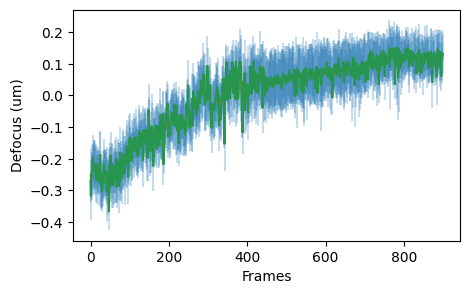

In [19]:
from scipy.stats import pearsonr

plt.figure(figsize=(5,3))


from scipy.ndimage import gaussian_filter1d

y = pred_frame_z_refit_um
smoothed_y = gaussian_filter1d(y, sigma=5)

plt.errorbar(frames, y, errors, alpha=0.25, label='stDev of residual to plane fit')
plt.plot(frames, smoothed_y)
plt.plot(frames, y)

# plt.scatter(frames, pred_frame_z_refit_um)
plt.xlabel('Frames')
plt.ylabel('Defocus (um)')
plt.show()

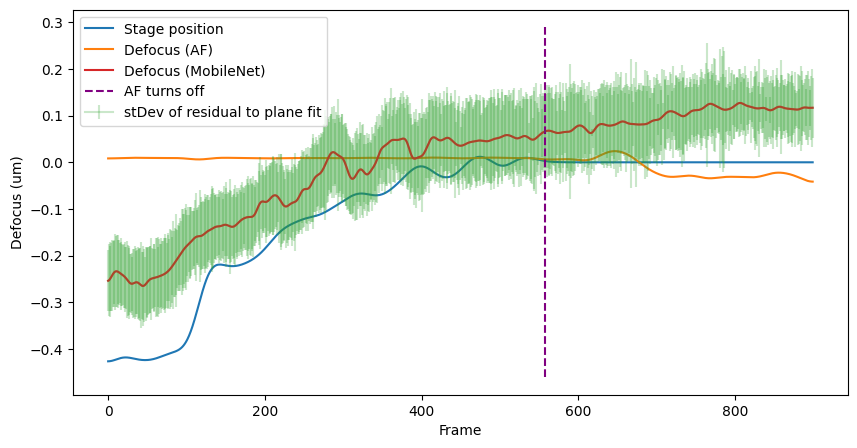

Assumptions:
	- Timelapse / AF readouts scaled to cover same duration
	- Defocus (AF) is inverted


In [20]:
import numpy as np

plt.figure(figsize=(10, 5))

comp_df = pd.read_csv(comparison_data, names=['Z drive status', 'timestamp', 'defocus', 'stage position'])
comp_df['timestamp'] = pd.to_datetime(comp_df['timestamp'], format='ISO8601')
comp_df['timestamp'] = [x.timestamp() for x in comp_df['timestamp']]
comp_df['timestamp'] -= comp_df['timestamp'][0]
comp_df['frame'] = np.linspace(0, max(frames), comp_df.shape[0])

comp_df['stage position'] -= comp_df['stage position'].to_numpy()[-1]
for c in ['stage position', 'defocus']:
    comp_df[c] = gaussian_filter1d(comp_df[c], sigma=25)

comp_df['defocus'] *= -1


# Vertical line
switch_idx = np.argwhere((comp_df['Z drive status'].to_numpy()[:-1] != comp_df['Z drive status'].to_numpy()[1:]))
switch_frame = comp_df['frame'].to_numpy()[switch_idx]
ymin = comp_df[['defocus', 'stage position']].to_numpy().min()
ymax = comp_df[['defocus', 'stage position']].to_numpy().max()

plt.plot(comp_df['frame'], comp_df['stage position'], label='Stage position')

plt.plot(comp_df['frame'], comp_df['defocus']-comp_df['defocus'].mean(), label='Defocus (AF)')

plt.errorbar(frames, smoothed_y-np.nanmean(smoothed_y), errors, alpha=0.25, label='stDev of residual to plane fit')

plt.plot(frames, smoothed_y-np.nanmean(smoothed_y), label='Defocus (MobileNet)')

ax = plt.gca()
plt.vlines([switch_frame], label='AF turns off', ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='purple', linestyle='dashed')


# plt.show()

# plt.figure(figsize=(10, 5))
plt.xlabel('Frame')
plt.ylabel('Defocus (um)')
plt.legend()
plt.savefig(out_fig_name)
plt.show()
print('Assumptions:')
print('\t- Timelapse / AF readouts scaled to cover same duration')
print('\t- Defocus (AF) is inverted')



In [20]:
out_fig_name

'./autofocus_experiment1.png'

In [ ]:
# Across multiple models

from glob import glob
import h5py
import matplotlib

def snr(x):
    return x.max() / x.mean()

def eval_model_timelapse(locs_path):
    import numpy as np
    
    locs = pd.read_hdf(locs_path, key='locs')
    model_dir = os.path.join(os.path.dirname(locs_path), os.pardir, os.pardir)
    print(model_dir)
    test_fpath = os.path.join(test_data_dir, test_case)
    
    
    locs_path = test_fpath.replace('.tif', '_locs.hdf5')
    spots_path = test_fpath.replace('.tif', '_spots.hdf5')

    with h5py.File(spots_path) as f:
        spots = np.array(f['spots'])


    snrs = np.array([snr(x) for x in spots])
    inten = spots.max(axis=(1,2))
    z_pos = locs['z [nm]'].to_numpy()

    # sample = 10000
    # idx = np.random.choice(np.arange(snrs.shape[0]), 10000)
    # snrs = snrs[idx]
    # inten = inten[idx]
    # z_pos = z_pos[idx]

    # plt.scatter(inten, z_pos)
    # plt.ylabel('Z pos')
    # plt.xlabel('inten')
    # plt.show()


    
    # matplotlib.rcParams['figure.figsize'] = (5, 3)
    # fig, ax = plt.subplots()
    
    # s1 = ax.scatter(x=snrs, y=z_pos, label='snrs', marker='.', alpha=0.5)
    # ax.set_xlabel('snrs')
    # ax.set_ylabel('z pos (nm)')
    # ax2 = ax.twinx()
    # ax2.tick_params(axis='y', colors='red')
    # s2 = ax2.scatter(x=snrs, y=inten, label='inten', c='red', marker='.', alpha=0.5)
    # ax2.set_ylabel('peak pixel value (intensity)')


    # plt.title(norm)
    # ax.legend(loc=2)
    # ax2.legend(loc=1)
    # plt.show()
    # return

    # plt.figure(figsize=(10, 3))
    # sns.scatterplot(data=locs, x='frame', y='z [nm]', marker='.')
    # plt.xlabel('Frame')
    # plt.ylabel('Pred z (um)')
    # plt.show()

    # Fit plane, remove outliers and re-fit plane
    from sklearn.linear_model import LinearRegression
    import seaborn as sns
    from data.visualise import grid_psfs
    import numpy as np
    
    
    frames = []
    pred_frame_z_init = []
    pred_frame_z_refit = []
    frame_errors = []
    xy_nm = locs[['x [nm]', 'y [nm]']].to_numpy()
    pred_z = locs['z [nm]'].to_numpy()
    for frame in list(sorted(set(locs['frame']))):
        idx = np.argwhere(locs['frame']==frame).squeeze()
        if idx.size<4:
            # pred_frame_z_init.append(np.mean(pred_z[idx]))
            # pred_frame_z_refit.append(np.mean(pred_z[idx]))
            # print(f'Frame {frame} has insufficient locs')
            continue
        XY_data = xy_nm[idx]
        Z_data = pred_z.squeeze()[idx]
        reg = LinearRegression().fit(XY_data, Z_data)
        pred_frame_z_init.append(reg.intercept_)
    
        
        z_fit = reg.predict(XY_data)
        errors = abs(z_fit - Z_data)
        # if frame == 550:
        #     sns.scatterplot(x=XY_data[:, 0], y=XY_data[:, 1], hue=Z_data)
        #     plt.show()
        cutoff = np.percentile(errors, 75)
        idx = np.argwhere(errors<cutoff).squeeze()
        
        XY_data = XY_data[idx]
        Z_data = Z_data[idx]
        
        reg = LinearRegression().fit(XY_data, Z_data)
        residual = reg.predict(XY_data)
        res_error = np.std(residual / 1000)
        
    
        frames.append(frame)
        pred_frame_z_refit.append(reg.intercept_)
        frame_errors.append(res_error)
    
    pred_frame_z_refit_um = (pred_frame_z_refit - pred_frame_z_refit[0]) / 1000
    frames = np.array(frames)
    errors = np.array(frame_errors)

    from scipy.stats import pearsonr
    
    plt.figure(figsize=(5,3))
    
    
    from scipy.ndimage import gaussian_filter1d
    
    y = pred_frame_z_refit_um
    smoothed_y = gaussian_filter1d(y, sigma=25)
    
    plt.errorbar(frames, smoothed_y, errors, alpha=0.1, label='stDev of residual to plane fit')
    plt.plot(frames, smoothed_y)
    
    # plt.scatter(frames, pred_frame_z_refit_um)
    plt.xlabel('Frames')
    plt.ylabel('Defocus (um)')
    plt.show()

    import numpy as np

    plt.figure(figsize=(10, 5))
    
    comp_df = pd.read_csv(comparison_data, names=['Z drive status', 'timestamp', 'defocus', 'stage position'])
    comp_df['timestamp'] = pd.to_datetime(comp_df['timestamp'], format='ISO8601')
    comp_df['timestamp'] = [x.timestamp() for x in comp_df['timestamp']]
    comp_df['timestamp'] -= comp_df['timestamp'][0]
    comp_df['timestamp'] = np.linspace(0, max(frames), comp_df.shape[0])
    
    comp_df['stage position'] -= comp_df['stage position'].to_numpy()[-1]
    for c in ['stage position', 'defocus']:
        comp_df[c] = gaussian_filter1d(comp_df[c], sigma=25)
    
    comp_df['defocus'] *= -1
    for status in ['Z_ON', 'Z_OFF']:
        tmp_df = comp_df[comp_df['Z drive status']==status]
        plt.plot(tmp_df['timestamp'], tmp_df['stage position'], label=f'Stage position ({status})')
    plt.plot(frames, smoothed_y, label='Defocus (MobileNet)')
    
    
    # plt.show()
    
    # plt.figure(figsize=(10, 5))
    plt.plot(comp_df['timestamp'], comp_df['defocus'], label='Defocus (AF)')
    # plt.title(f'norm: {norm}')
    plt.xlabel('Frame')
    plt.ylabel('Defocus (um)')
    plt.legend()
    plt.show()
    print('Assumptions:')
    print('\t- Timelapse / AF readouts scaled to cover same duration')
    print('\t- Defocus (AF) is inverted')
    print(f"\t- Sum of Z preds: {pred_z.sum()}")
    # print(f"\t- norm: {norm}")
    print('-'*25)

from natsort import natsorted
loc_files = natsorted(glob('/home/miguel/Projects/smlm_z/autofocus/VIT_zeiss/*/timelapse/locs_3d.hdf5'))
for loc_file in loc_files:
    eval_model_timelapse(loc_file)

In [ ]:
frame_switch = int(np.mean(frames))

print('AF On version')
frames_on = frames[:frame_switch]
pred_frame_z_refit_on = pred_frame_z_refit_um[:frame_switch]
sns.scatterplot(x=frames_on, y=pred_frame_z_refit_on*1000, label='refit plane fit', ax=ax)
ax.set_ylabel('Defocus (um)')
ax.set_xlabel('Frame')
# ax.plot(comp_df_af_on['time stamp'], -comp_df_af_on['Defocus/um'], color='orange', label='Autofocus')
ax.legend(loc=0)
ax.legend(loc=2)
plt.show()


fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)

print('AF Off version')
frames_off = frames[frame_switch:]
pred_frame_z_refit_off = pred_frame_z_refit_um[frame_switch:]
sns.scatterplot(x=frames_off, y=pred_frame_z_refit_off, label='refit plane fit', ax=ax)
ax.set_ylabel('Defocus (um)')
ax.set_xlabel('Frame')
# ax.plot(comp_df_af_off['time stamp'], comp_df_af_off['Defocus/um'], color='orange', label='Autofocus')
ax.legend(loc=0)
plt.show()

In [ ]:
# Manual cutoff

onoff_cutoff = int(locs['frame'].max()/2)

# Fit plane, remove outliers and re-fit plane
from sklearn.linear_model import LinearRegression
import seaborn as sns
from data.visualise import grid_psfs
import numpy as np


frames = []
pred_frame_z_init = []
pred_frame_z_refit = []
xy_nm = locs[['x [nm]', 'y [nm]']].to_numpy()
pred_z = locs['z [nm]'].to_numpy()
for frame in list(sorted(set(locs['frame']))):
    idx = np.argwhere(locs['frame']==frame).squeeze()
    if idx.size<4:
        # pred_frame_z_init.append(np.mean(pred_z[idx]))
        # pred_frame_z_refit.append(np.mean(pred_z[idx]))
        print(f'Frame {frame} has insufficient locs')
        continue
    XY_data = xy_nm[idx]
    Z_data = pred_z.squeeze()[idx]
    reg = LinearRegression().fit(XY_data, Z_data)
    pred_frame_z_init.append(reg.intercept_)

    
    z_fit = reg.predict(XY_data)
    errors = abs(z_fit - Z_data)
    # if frame == 550:
    #     sns.scatterplot(x=XY_data[:, 0], y=XY_data[:, 1], hue=Z_data)
    #     plt.show()
    cutoff = np.percentile(errors, 75)
    idx = np.argwhere(errors<cutoff).squeeze()
    
    XY_data = XY_data[idx]
    Z_data = Z_data[idx]
    
    reg = LinearRegression().fit(XY_data, Z_data)

    frames.append(frame)
    pred_frame_z_refit.append(reg.intercept_)

plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=frames[:onoff_cutoff], y=pred_frame_z_refit[:onoff_cutoff])
plt.title('AF on')
plt.xlabel('Frame')
plt.ylabel('Defocus (um)')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
sns.histplot(pred_frame_z_refit[:onoff_cutoff])
plt.title('Defocus (um) frequency while AF on')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=frames[onoff_cutoff:], y=pred_frame_z_refit[onoff_cutoff:])
plt.title('AF off')
plt.xlabel('Frame')
plt.ylabel('Defocus (um)')
plt.show()


In [ ]:
# Comparison without autofocus 
# Fit plane, remove outliers and re-fit plane
from sklearn.linear_model import LinearRegression
import seaborn as sns
from data.visualise import grid_psfs
import numpy as np


frames = []
pred_frame_z_init = []
pred_frame_z_refit = []
xy_nm = locs[['x [nm]', 'y [nm]']].to_numpy()
pred_z = locs['z [nm]'].to_numpy()
for frame in list(sorted(set(locs['frame']))):
    idx = np.argwhere(locs['frame']==frame).squeeze()
    if idx.size<4:
        # pred_frame_z_init.append(np.mean(pred_z[idx]))
        # pred_frame_z_refit.append(np.mean(pred_z[idx]))
        print(f'Frame {frame} has insufficient locs')
        continue
    XY_data = xy_nm[idx]
    Z_data = pred_z.squeeze()[idx]
    reg = LinearRegression().fit(XY_data, Z_data)
    pred_frame_z_init.append(reg.intercept_)

    
    z_fit = reg.predict(XY_data)
    errors = abs(z_fit - Z_data)
    # if frame == 550:
    #     sns.scatterplot(x=XY_data[:, 0], y=XY_data[:, 1], hue=Z_data)
    #     plt.show()
    cutoff = np.percentile(errors, 75)
    idx = np.argwhere(errors<cutoff).squeeze()
    
    XY_data = XY_data[idx]
    Z_data = Z_data[idx]
    
    reg = LinearRegression().fit(XY_data, Z_data)

    frames.append(frame)
    pred_frame_z_refit.append(reg.intercept_)

pred_frame_z_refit_um = (pred_frame_z_refit - pred_frame_z_refit[0]) / 1000
frames = np.array(frames)

plt.figure(figsize=(10, 5), dpi=80)
plt.scatter(frames, pred_frame_z_refit_um)
plt.xlabel('Frame')
plt.ylabel('Defocus (um)')
plt.show()

In [ ]:

training_data = imread(os.path.join('/home/miguel/Projects/smlm_z/autofocus/VIT_autofocus2/stacks.ome.tif')).astype(float)
training_data = norm_psf_frame(training_data)


In [ ]:
# Comparison data
import numpy as np
from tifffile import imread
def get_img_gradient(img):
    return np.sum(img)
    gy, gx = np.gradient(img)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    return sharpness

def norm_psf_frame(psfs):
    for i in range(psfs.shape[0]):
        psf_min = psfs[i].min(axis=(1,2), keepdims=True)
        psfs[i] -= psf_min
        psf_max = psfs[i].max(axis=(1,2), keepdims=True)
        psfs[i] /= psf_max
    psfs[psfs<0] = 0
    return psfs
    
def get_stack_gradient(stack):
    return np.array([get_img_gradient(s) for s in stack])

for s in training_data[0:10]:
    plt.plot(np.arange(s.shape[0])*10, get_stack_gradient(s))
plt.show()


norm_spots = norm_psf_frame(spots).squeeze()
spots_gradient = get_stack_gradient(norm_spots)

frame_grads = []
for frame in set(locs['frame']):
    idx = np.argwhere(locs['frame']==frame).squeeze()
    grads = spots_gradient[idx]
    frame_grads.append(grads)

fig, ax1 = plt.subplots()

ax1.scatter(x=frames+1, y=[np.mean(x) for x in frame_grads], label='mean gradient', color='red', marker='x')
ax1.set_ylabel('Mean of sum(gradient) in normalised images')
plt.xlabel('Frame')
# plt.show()

ax2 = ax1.twinx()
ax2.scatter(x=frames+1, y=pred_frame_z_refit, label='refit plane fit', color='blue', marker='.')
ax2.legend(loc=0)
ax1.legend(loc=2)
plt.xlabel('Frame of time-lapse')
ax2.set_ylabel('Defocus / Z position (nm)')
plt.show()

In [ ]:
frame = 550
idx = np.argwhere(locs['frame']==frame).squeeze()

XY_data = xy_nm[idx]
Z_data = pred_z.squeeze()[idx][:, np.newaxis]

print(XY_data.shape)
print(Z_data.shape)

points = np.concatenate((XY_data, Z_data), axis=1)
data_mean = np.mean(points, axis=0)
data_centered = points - data_mean
U, S, Vt = np.linalg.svd(data_centered)
normal = Vt[-1, :]
d = -np.dot(normal, data_mean)

# Calculate the plane equation coefficients
a, b, c = normal
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point cloud
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=2, c='b')

# Create a meshgrid for the plane
x_plane = np.linspace(-2, 2, 100)
y_plane = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_plane, y_plane)
Z = (-normal[0] * X - normal[1] * Y - d) / normal[2]

# Plot the plane
ax.plot_surface(X, Y, Z, alpha=0.9, color='r')

# Draw lines from the plane to each point
for point in points:
    x, y, z = point
    z_plane = (-normal[0] * x - normal[1] * y - d) / normal[2]
    ax.plot([x, x], [y, y], [z_plane, z], c='r', lw=0.5)

# Set axis labels and title
ax.set_xlabel('X (standardised)')
ax.set_ylabel('Y (standardised)')
ax.set_zlabel('Z (nm)')

# Show the plot
plt.show()